In [30]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [26]:
import pickle

# File paths for all three embeddings
embeddings_files = [
    "extracted_data/GPT embeddings/mcar_beta0_gpt_emb.pickle",
    "extracted_data/GPT embeddings/noise0.6_gpt_emb.pickle",
    "extracted_data/GPT embeddings/mcar_beta0.1_gpt_emb.pickle",
    "extracted_data/GPT embeddings/mnar_beta0.1_gpt_emb.pickle",
    "extracted_data/GPT embeddings/mar_beta0.1_gpt_emb.pickle"
]

# Load all embeddings into a dictionary
embeddings_dict = {}
for file in embeddings_files:
    with open(file, 'rb') as f:
        embeddings_dict[file] = pickle.load(f)


In [27]:
def process_tsne(file):
    # Load the embeddings data
    with open(file, 'rb') as f:
        data = pickle.load(f)

    embeddings = []
    labels = []

    # Extract embeddings and labels from the data
    for key in data.keys():
        embeddings.append(data[key]['seq'])  # Add the embedding for the sequence
        labels.append(data[key]['label'])    # Add the corresponding label (0 or 1)

    # Convert to numpy arrays
    embeddings = np.array(embeddings)
    labels = np.array(labels)

    # Perform t-SNE on the embeddings
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot the t-SNE results, colored by the label with semi-transparent points
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', alpha=0.2)
    plt.colorbar(label="Label")
    plt.title(f't-SNE for {file}')
    plt.show()

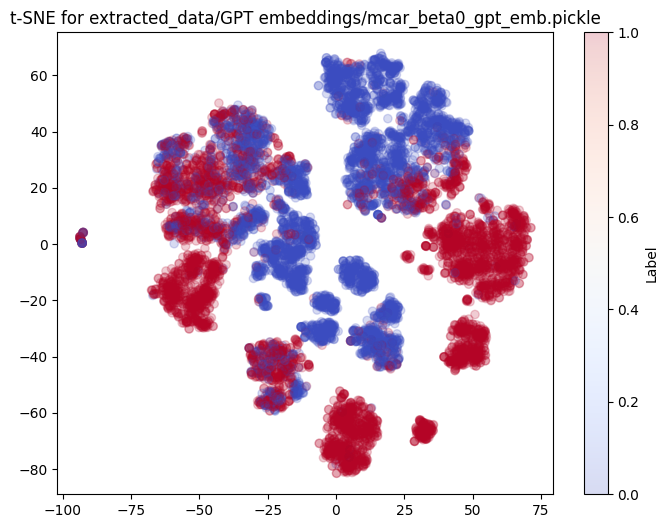

In [31]:
process_tsne('extracted_data/GPT embeddings/mcar_beta0_gpt_emb.pickle')

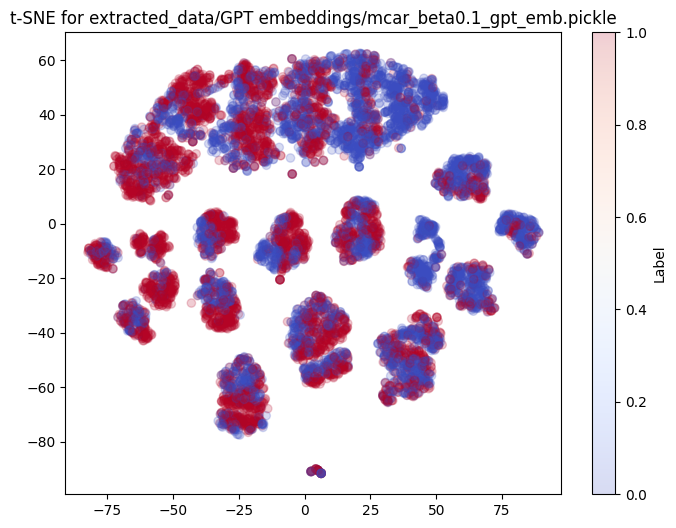

In [ ]:
process_tsne('extracted_data/GPT embeddings/mcar_beta0.1_gpt_emb.pickle')

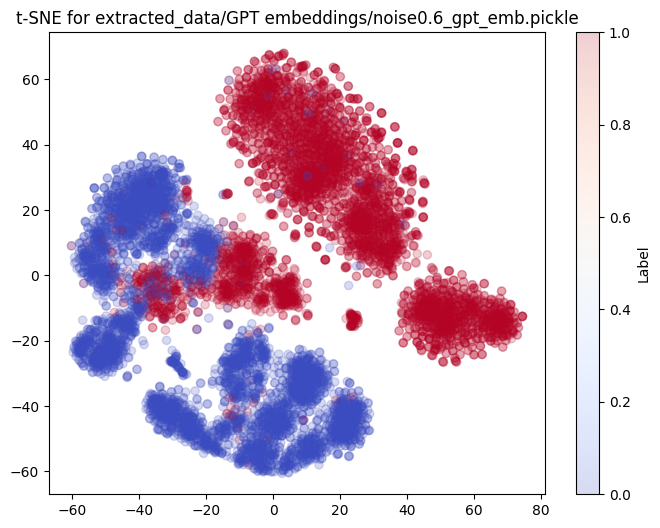

In [32]:
process_tsne('extracted_data/GPT embeddings/noise0.6_gpt_emb.pickle')

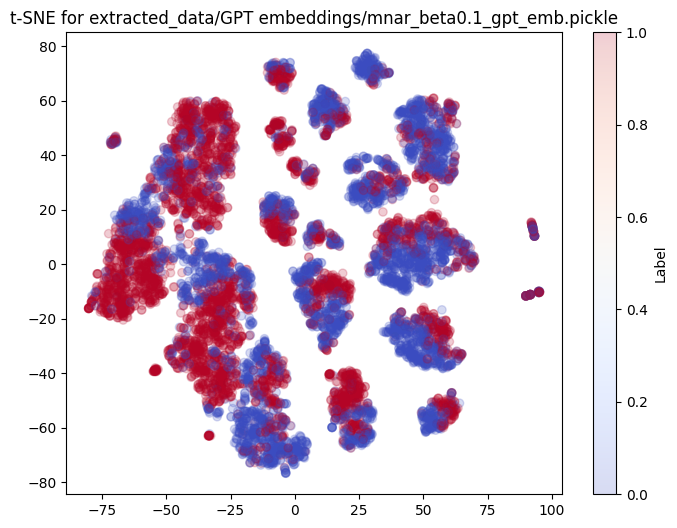

In [33]:
process_tsne('extracted_data/GPT embeddings/mnar_beta0.1_gpt_emb.pickle')

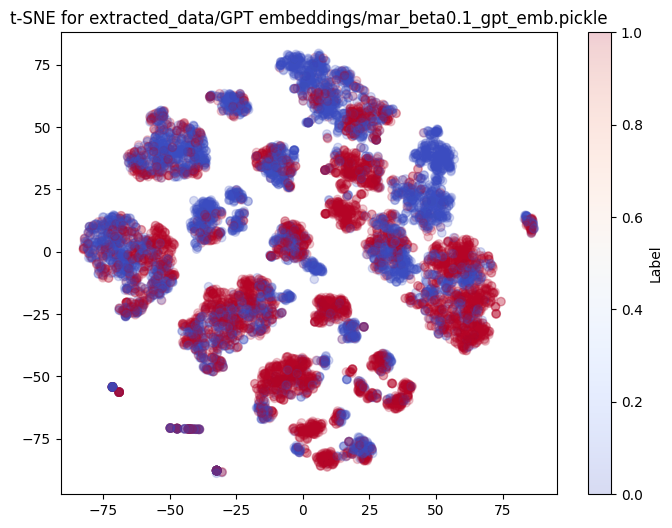

In [34]:
process_tsne('extracted_data/GPT embeddings/mar_beta0.1_gpt_emb.pickle')